IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      95.0 -0.022327   0.060534    1.643326   0.246772        100.0   
1      51.0 -0.034240   0.020069   -0.178685   0.145571         92.0   
2      88.0 -0.001811   0.007055   -0.249857   0.083915          0.0   
3      56.0  0.002267   0.007244   -0.346576   0.085039          0.0   
4      37.0  0.004281   0.007441   -0.416814   0.086259          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   30.0 -0.044465   0.018415   -0.796126   0.142632         81.0   
1345   47.0  0.002880   0.007362   -0.387752   0.085745          0.0   
1346   59.0 -0.048743   0.006285   -0.096741   0.092982          0.0   
1347   17.0 -0.039734   0.027035    1.501310   0.168939         75.0   
1348   74.0 -0.117119   0.033549   -0.656390   0.217225          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0           127.0   13.945019    8.013275 -0.040148  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.022327   0.060534    1.643326   0.246772        100.0        127.0   
1    -0.034240   0.020069   -0.178685   0.145571         92.0        117.0   
2    -0.001811   0.007055   -0.249857   0.083915          0.0        123.0   
3     0.002267   0.007244   -0.346576   0.085039          0.0        111.0   
4     0.004281   0.007441   -0.416814   0.086259          0.0         95.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.044465   0.018415   -0.796126   0.142632         81.0         79.0   
1345  0.002880   0.007362   -0.387752   0.085745          0.0         97.0   
1346 -0.048743   0.006285   -0.096741   0.092982          0.0        100.0   
1347 -0.039734   0.027035    1.501310   0.168939         75.0         96.0   
1348 -0.117119   0.033549   -0.656390   0.217225          0.0        135.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.021648   0.009686    2.554482   0.100639         78.0         58.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    5.138527    4.327161 -0.008078   0.006447  ...       5440.639198   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.410924          0.502255          -0.265913          3.483575   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               138.0               137.0            8.85157   

     amp2(Curr(ESC_5))  Guasto  
340           8.676921       1  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.022327   0.060534    1.643326   0.246772        100.0        127.0   
1    -0.034240   0.020069   -0.178685   0.145571         92.0        117.0   
2    -0.001811   0.007055   -0.249857   0.083915          0.0        123.0   
3     0.002267   0.007244   -0.346576   0.085039          0.0        111.0   
4     0.004281   0.007441   -0.416814   0.086259          0.0         95.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.044465   0.018415   -0.796126   0.142632         81.0         79.0   
1345  0.002880   0.007362   -0.387752   0.085745          0.0         97.0   
1346 -0.048743   0.006285   -0.096741   0.092982          0.0        100.0   
1347 -0.039734   0.027035    1.501310   0.168939         75.0         96.0   
1348 -0.117119   0.033549   -0.656390   0.217225          0.0        135.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.022327   0.060534    1.643326   0.246772   100.000000   127.000000   
1    -0.034240   0.020069   -0.178685   0.145571    92.000000   117.000000   
2    -0.001811   0.007055   -0.249857   0.083915     0.000000   123.000000   
3     0.002267   0.007244   -0.346576   0.085039     0.000000   111.000000   
4     0.004281   0.007441   -0.416814   0.086259     0.000000    95.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.035919   0.010113    1.865429   0.106671    71.554212    97.369474   
1619 -0.026376   0.009815    2.297436   0.102399    88.272141    63.603520   
1620  0.010051   0.007597   -0.464575   0.087618    74.156248    64.072920   
1621 -0.021403   0.009754    2.522216   0.100921    62.064308    83.871384   
1622 -0.000406   0.007028   -0.252303   0.083737     0.000000   115.040939   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=50)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=50, score_func=<function f_regression at 0x00000226C3E9D120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
  True False False False  True False  True False  True False  True  True
 False False False False False False False False False False  True  True
 False False False False False False False False False  True False  True
 False  True  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False  True False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False  True False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(166,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.280940
28         freq1(AccX)  3.484626
12         freq1(GyrY)  3.184761
11           RMS(GyrY)  2.775999
93   freq2(RPM(ESC_1))  2.711150
..                 ...       ...
74    kurt(RPM(ESC_0)) -0.752368
82   kurt(Curr(ESC_0)) -0.752664
155  freq2(RPM(ESC_5)) -0.752764
45         freq2(AccZ) -0.752870
114  kurt(Curr(ESC_2)) -0.753174

[166 rows x 2 columns]


In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.022327   0.060534   100.000000 -0.040148   0.033956   0.188394   
1    -0.034240   0.020069    92.000000  0.018260   0.006420   0.082083   
2    -0.001811   0.007055     0.000000  0.012615   0.005234   0.073358   
3     0.002267   0.007244     0.000000  0.014642   0.005529   0.075694   
4     0.004281   0.007441     0.000000  0.015580   0.005722   0.077137   
...        ...        ...          ...       ...        ...        ...   
1618 -0.035919   0.010113    71.554212 -0.009879   0.005919   0.077477   
1619 -0.026376   0.009815    88.272141 -0.008564   0.006201   0.079106   
1620  0.010051   0.007597    74.156248  0.021865   0.005577   0.077711   
1621 -0.021403   0.009754    62.064308 -0.008027   0.006497   0.080894   
1622 -0.000406   0.007028     0.000000  0.013240   0.005287   0.073827   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
0        0.000000   17.678449  

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.021648   0.009686         78.0 -0.008078   0.006447   0.080588   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
340        107.0    5.263806    3.980146   0.004836  ...               59.0   

     freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  var(RPM(ESC_5))  \
340               56.0         -1.006647          -1.272984    982167.946089   

     kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  <>(Curr(ESC_5))  \
340         -0.931622       6839.017304       5440.639198         3.410924   

     var(Curr(ESC_5))  
340          0.502255  

[1 rows x 50 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.022327   0.060534   100.000000 -0.040148   0.017256   -1.506212   
1    -0.034240   0.020069    92.000000  0.018260   0.014311   -1.058899   
2    -0.001811   0.007055     0.000000  0.012615   0.005392   -0.798026   
3     0.002267   0.007244     0.000000  0.014642   0.005685   -0.894479   
4     0.004281   0.007441     0.000000  0.015580   0.005813   -0.911378   
...        ...        ...          ...       ...        ...         ...   
1618 -0.035919   0.010113    71.554212 -0.009879   0.004250   -1.228589   
1619 -0.026376   0.009815    88.272141 -0.008564   0.004627   -1.363556   
1620  0.010051   0.007597    74.156248  0.021865   0.005993   -0.883785   
1621 -0.021403   0.009754    62.064308 -0.008027   0.004876   -1.448230   
1622 -0.000406   0.007028     0.000000  0.013240   0.005459   -0.822282   

      RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  ...  freq2(Pitch)  \
0      0.210662    0.694140

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.021648   0.009686         78.0 -0.008078   0.004836   -1.435146   

     RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  ...  freq2(Pitch)  \
340   0.111982    1.640959 -0.064419  203.699451  ...         105.0   

     kurt(RPM(ESC_1))  var(Curr(ESC_1))  amp2(Curr(ESC_1))  <>(RPM(ESC_2))  \
340         -1.825545          0.552663           12.94333     5136.119565   

     var(Curr(ESC_2))  kurt(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  \
340          0.309972         -1.085281         -1.006647          -1.272984   

     amp2(RPM(ESC_5))  
340       5440.639198  

[1 rows x 21 columns]


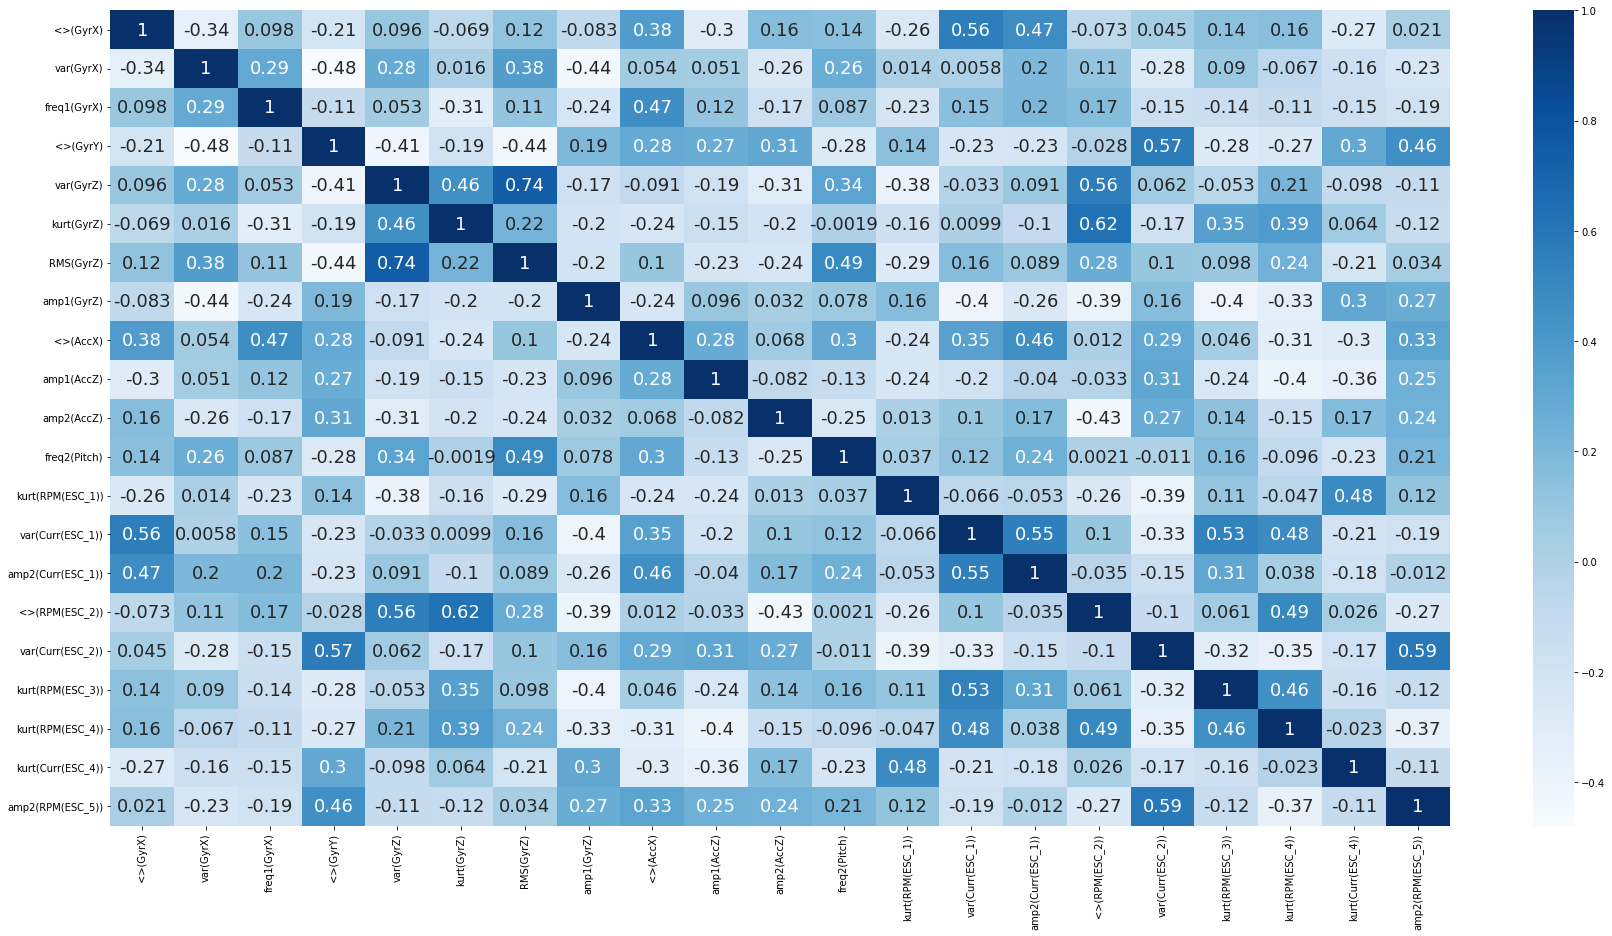

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 21)
(325, 21)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []


### Classificazione

Cross-Validation: [0.81153846 0.80384615 0.75769231 0.76447876 0.76447876]
Accuracy: 0.8 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


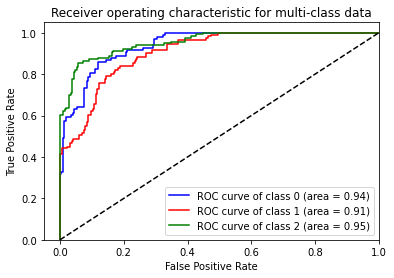

Cross-Validation: [0.47692308 0.54615385 0.53076923 0.51737452 0.52123552]
Accuracy: 0.48 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


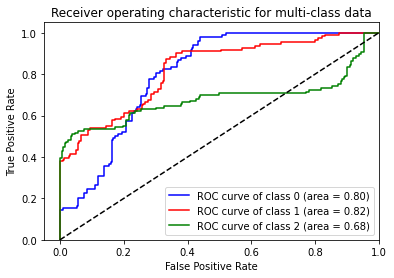

Cross-Validation: [0.55769231 0.73846154 0.50769231 0.77992278 0.77992278]
Accuracy: 0.8 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


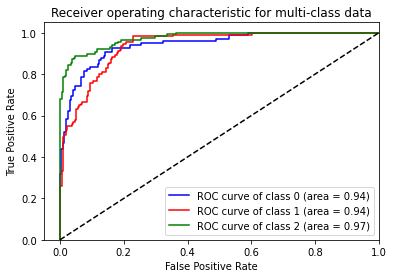

Cross-Validation: [0.50384615 0.57692308 0.49230769 0.5984556  0.59459459]
Accuracy: 0.66 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


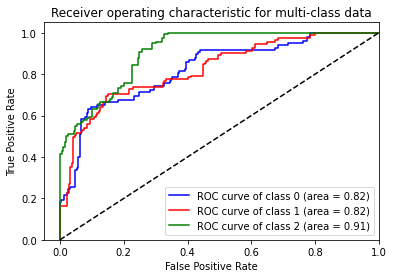

In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

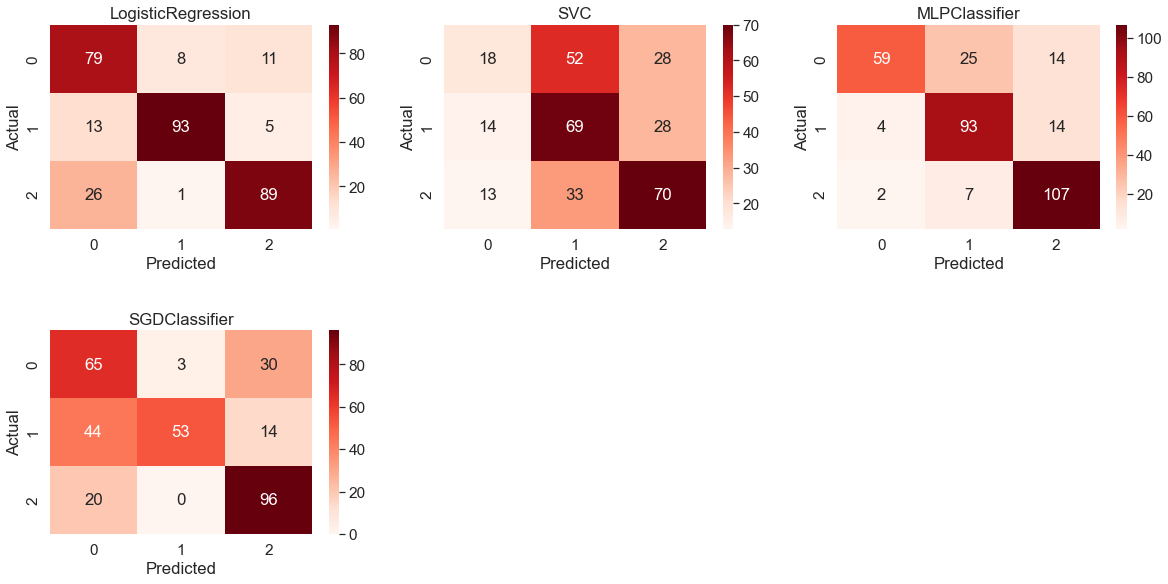

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Score

Text(0.5, 1.0, 'Cross validation scores')

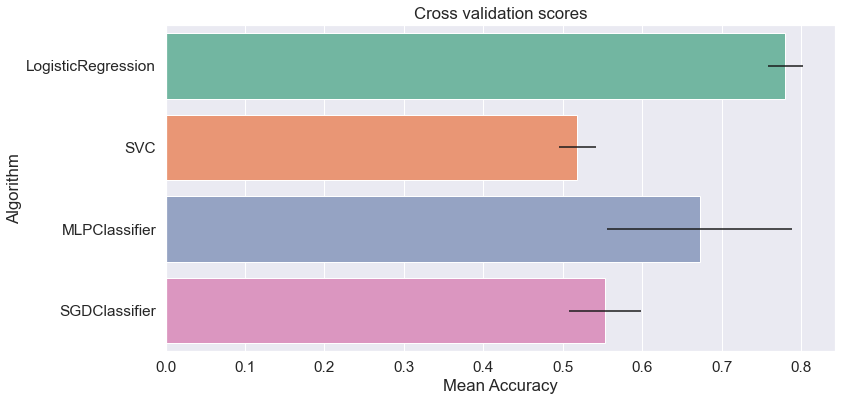

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        98
           1       0.91      0.84      0.87       111
           2       0.85      0.77      0.81       116

    accuracy                           0.80       325
   macro avg       0.81      0.80      0.80       325
weighted avg       0.82      0.80      0.81       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        98
           1       0.45      0.62      0.52       111
           2       0.56      0.60      0.58       116

    accuracy                           0.48       325
   macro avg       0.47      0.47      0.45       325
weighted avg       0.47      0.48      0.46       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.60      0.72        98
           1       0.74